In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

plt.style.use("ggplot")

plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'lines.linewidth': 2.5,
    'axes.grid': True,
    'grid.alpha': 0.5
})

In [80]:
from analysis import get_stats

In [81]:
stats = get_stats("d5", "/data/samuel/results-r132b-bf16/")
stats

[5,
 25,
 81,
 2,
 11.914668149999999,
 0.10831516499999999,
 476076.39090909093,
 394068.15454545454,
 82008.23636363636,
         task_name  usd_cost  prompt_tokens  prompt_cached_tokens  \
 0    webarena.601  0.078193         238903                     0   
 1    webarena.583  0.099352         182063                     0   
 2    webarena.603  0.069993         208348                     0   
 3    webarena.610  0.071495         196187                     0   
 4    webarena.600  0.081348         240601                     0   
 ..            ...       ...            ...                   ...   
 105  webarena.625  0.085038         186661                     0   
 106  webarena.620  0.057675         171686                     0   
 107  webarena.624  0.094078         156837                     0   
 108  webarena.626  0.118415         265451                     0   
 109  webarena.627  0.111950         287046                     0   
 
      prompt_non_cached_tokens  completion_toke

In [ ]:
d5_stats = get_stats("d5", "/data/samuel/results-nd/")
d10_stats = get_stats("d10", "/data/samuel/results-nd/")
d20_stats = get_stats("d20", "/data/samuel/results-nd/")
d100_stats = get_stats("e100", "/data/samuel/results-nd/")

df_nd = pd.DataFrame([d5_stats, d10_stats, d20_stats, d100_stats], 
                  columns=["mcts_depth", "successes", "failures", "errors", "total_usd", "avg_usd", "avg_tokens", "avg_prompt", "avg_completion", "token_df", "total_time", "avg_time", "avg_prop_time", "avg_eval_time", "avg_step_time", "time_df", "avg_completion_iteration", "avg_completion_depth", "mcts_df"])
df_nd.set_index("mcts_depth", inplace=True)
df_nd["success_rate"] = df_nd["successes"] / (df_nd[["successes", "failures", "errors"]].sum(axis=1))
# df_r1 = df_nd[["successes", "failures", "errors", "avg_tokens", "avg_prompt", "avg_completion", "avg_time", "avg_prop_time", "avg_eval_time", "avg_step_time", "token_df", "time_df", "mcts_df"]]
df_nd

,successes,failures,errors,total_usd,avg_usd,avg_tokens,avg_prompt,avg_completion,token_df,total_time,avg_time,avg_prop_time,avg_eval_time,avg_step_time,time_df,avg_completion_iteration,avg_completion_depth,mcts_df,success_rate
mcts_depth,,,,,,,,,,,,,,,,,,,
5,14,83,9,3.639984,0.034339,168209.594340,147969.528302,20240.066038,task_name usd_cost prompt_tokens pr...,50816.707428,479.402900,189.362815,108.004408,120.619324,task_name total_time_taken total_pro...,2.357143,4.714286,completion_iteration completion...,0.132075
10,12,85,9,4.631175,0.043690,203777.603774,174613.858491,29163.745283,task_name usd_cost prompt_tokens pr...,73172.907518,690.310448,236.657843,121.910255,174.458772,task_name total_time_taken total_pro...,1.000000,6.583333,completion_iteration completion...,0.113208
20,8,91,7,9.575581,0.090336,460726.603774,413556.198113,47170.405660,task_name usd_cost prompt_tokens pr...,138819.981616,1309.622468,376.618517,234.946513,288.917886,task_name total_time_taken total_pro...,1.000000,9.375000,completion_iteration completion...,0.075472
100,9,74,13,15.519388,0.159994,878608.061856,815935.876289,62672.185567,task_name usd_cost prompt_tokens pro...,80550.312426,830.415592,503.033983,322.929495,336.195385,task_name total_time_taken total_prop...,0.000000,5.000000,completion_iteration completion...,0.093750


In [112]:
d5_stats = get_stats("d5", "/data/samuel/results-r132b-bf16/")
d10_stats = get_stats("d10", "/data/samuel/results-r132b-bf16/")
d20_stats = get_stats("d20", "/data/samuel/results-r132b-bf16/")
d100_stats = get_stats("e100", "/data/samuel/results-r132b-bf16/")

df_r1 = pd.DataFrame([d5_stats, d10_stats, d20_stats, d100_stats], 
                  columns=["mcts_depth", "successes", "failures", "errors", "total_usd", "avg_usd", "avg_tokens", "avg_prompt", "avg_completion", "token_df", "total_time", "avg_time", "avg_prop_time", "avg_eval_time", "avg_step_time", "time_df", "avg_completion_iteration", "avg_completion_depth", "mcts_df"])
df_r1.set_index("mcts_depth", inplace=True)
df_r1["success_rate"] = df_r1["successes"] / (df_r1[["successes", "failures", "errors"]].sum(axis=1))
# df_r1 = df_r1[["successes", "failures", "errors", "avg_tokens", "avg_prompt", "avg_completion", "avg_time", "avg_prop_time", "avg_eval_time", "avg_step_time", "token_df", "time_df", "mcts_df"]]
df_r1

,successes,failures,errors,total_usd,avg_usd,avg_tokens,avg_prompt,avg_completion,token_df,total_time,avg_time,avg_prop_time,avg_eval_time,avg_step_time,time_df,avg_completion_iteration,avg_completion_depth,mcts_df,success_rate
mcts_depth,,,,,,,,,,,,,,,,,,,
5,25,81,2,11.914668,0.108315,4.760764e+05,3.940682e+05,82008.236364,task_name usd_cost prompt_tokens pr...,180452.887654,1640.480797,1036.870008,421.524513,106.437073,task_name total_time_taken total_pro...,2.920000,4.400000,completion_iteration completion...,0.231481
10,34,69,2,15.841632,0.148053,6.472741e+05,5.340263e+05,113247.822430,task_name usd_cost prompt_tokens pr...,235639.261530,2202.236089,1309.311573,592.783625,164.951645,task_name total_time_taken total_pro...,2.176471,6.558824,completion_iteration completion...,0.323810
20,35,70,2,22.921202,0.208375,8.472956e+05,6.666728e+05,180622.727273,task_name usd_cost prompt_tokens pr...,386273.144483,3511.574041,2096.982787,879.989893,221.367512,task_name total_time_taken total_pro...,0.592593,7.703704,completion_iteration completion...,0.327103
100,28,75,6,67.181274,0.579149,2.569146e+06,2.138531e+06,430615.500000,task_name usd_cost prompt_tokens pr...,619201.611568,5337.944927,3500.116294,1766.541577,606.086697,task_name total_time_taken total_pro...,0.000000,6.250000,completion_iteration completion...,0.256881


In [84]:
(df_r1.loc[10].mcts_df["completion_depth"].value_counts().sort_index(),
df_r1.loc[10].mcts_df["completion_iteration"].value_counts().sort_index())

(completion_depth
 2.0     4
 4.0     6
 5.0     3
 6.0     2
 7.0     7
 8.0     3
 9.0     3
 10.0    2
 11.0    4
 Name: count, dtype: int64,
 completion_iteration
 0.0    20
 4.0     6
 5.0     3
 6.0     3
 8.0     1
 9.0     1
 Name: count, dtype: int64)

In [85]:
(df_r1.loc[20].mcts_df["completion_depth"].value_counts().sort_index(),
df_r1.loc[20].mcts_df["completion_iteration"].value_counts().sort_index())

(completion_depth
 2.0     3
 4.0     6
 5.0     5
 6.0     2
 7.0     1
 8.0     4
 11.0    2
 19.0    1
 20.0    2
 21.0    1
 Name: count, dtype: int64,
 completion_iteration
 0.0    22
 1.0     1
 3.0     3
 6.0     1
 Name: count, dtype: int64)

In [86]:
(df_r1.loc[100].mcts_df["completion_depth"].value_counts().sort_index(),
df_r1.loc[100].mcts_df["completion_iteration"].value_counts().sort_index())

(completion_depth
 2.0     3
 4.0     4
 5.0     8
 6.0     4
 7.0     2
 8.0     1
 9.0     3
 11.0    1
 12.0    1
 17.0    1
 Name: count, dtype: int64,
 completion_iteration
 0.0    28
 Name: count, dtype: int64)

In [87]:
df_r1["successes"]

mcts_depth
5      25
10     34
20     35
100    28
Name: successes, dtype: int64

In [88]:
df_r1[["success_rate", "successes", "failures", "errors"]]

KeyError: "['success_rate'] not in index"

In [ ]:
df_r1[["total_usd", "avg_usd"]]

,total_usd,avg_usd
mcts_depth,,
5,4.861763,0.045866
10,6.413142,0.060501
20,9.009063,0.084991
100,24.347977,0.245939


In [90]:
df_r1[["total_time", "avg_time"]]

KeyError: "['total_time'] not in index"

In [89]:
df_r1.loc[5].token_df.sum()["prompt_cached_tokens"] / df_r1.loc[20].token_df.sum()["total_tokens"]

0.0

In [ ]:
df_r1.loc[10].token_df.sum()["prompt_cached_tokens"] / df_r1.loc[20].token_df.sum()["total_tokens"]

np.float64(0.3818400765842733)

In [ ]:
df_r1.loc[20].token_df.sum()["prompt_cached_tokens"] / df_r1.loc[20].token_df.sum()["total_tokens"]

np.float64(0.5618936986507974)

In [ ]:
df_r1.loc[100].token_df.sum()["prompt_cached_tokens"] / df_r1.loc[100].token_df.sum()["total_tokens"]

np.float64(0.6384836215629782)

In [ ]:
df_r1.loc[20].mcts_df["completion_iteration"].value_counts().sort_values()

completion_iteration
4.0     1
8.0     1
3.0     1
2.0     3
0.0    29
Name: count, dtype: int64

In [ ]:
df_r1.loc[20].mcts_df["completion_iteration"] == 0

task_name
webarena.581     True
webarena.29     False
webarena.409    False
webarena.403     True
webarena.584    False
                ...  
webarena.646    False
webarena.648    False
webarena.621     True
webarena.624    False
webarena.725    False
Name: completion_iteration, Length: 106, dtype: bool

In [34]:

# plt.plot(x, y1, label="Series 1", linestyle='-', marker='o')
# plt.plot(x, y2, label="Series 2", linestyle='--', marker='s')

In [97]:
mini_20 = pd.Series(
    {
        0: 0, 2.0: 3, 3.0: 7, 4.0: 10, 5.0: 13, 6.0: 15, 
        7.0: 20, 8.0: 24, 9.0: 25, 10.0: 26, 11.0: 27, 
        12.0: 28, 16.0: 29, 17.0: 30, 20.0: 31, 21.0: 32, 
        22.0: 33, 82.0: 34, 103.0: 35, 188: 35
    },
    name="count",
    dtype="int64"
)
# type(mini_20)
mini_100 = pd.Series(
    {
        0: 0, 3.0: 2, 4.0: 6, 5.0: 8, 6.0: 13, 7.0: 14, 
        8.0: 19, 10.0: 22, 34.0: 23, 188: 23
    },
    name="count",
    dtype="int64"
)

In [98]:
nd_20 = df_nd.loc[20].mcts_df[
(df_nd.loc[20].mcts_df["completion_iteration"] >= 0)
].env_steps_taken.value_counts().sort_index().cumsum() + 4
nd_20[0] = 0
nd_20 = nd_20.sort_index()

nd_100 = df_nd.loc[100].mcts_df[
(df_nd.loc[100].mcts_df["completion_iteration"] >= 0)
].env_steps_taken.value_counts().sort_index().cumsum()
nd_100[0] = 0; nd_100[188] = 9
nd_100 = nd_100.sort_index()
nd_100

env_steps_taken
0.0      0
2.0      2
5.0      5
6.0      8
8.0      9
188.0    9
Name: count, dtype: int64

In [99]:
type(nd_20)

pandas.core.series.Series

In [107]:
r1_20 = df_r1.loc[20].mcts_df[
(df_r1.loc[20].mcts_df["completion_iteration"] >= 0)
].env_steps_taken.value_counts().sort_index().cumsum() + 8
r1_20[0] = 0; r1_20[188] = 35
r1_20 = r1_20.sort_index()

r1_100 = df_r1.loc[100].mcts_df[
(df_r1.loc[100].mcts_df["completion_iteration"] >= 0)
].env_steps_taken.value_counts().sort_index().cumsum()
r1_100[0] = 0; r1_100[100] = 28; r1_100[188] = 28
r1_100 = r1_100.sort_index()
r1_100

env_steps_taken
0.0       0
2.0       3
4.0       7
5.0      15
6.0      19
7.0      21
8.0      22
9.0      25
11.0     26
12.0     27
17.0     28
100.0    28
188.0    28
Name: count, dtype: int64

Text(0.5, 1.0, 'Tasks Completed V.S. Env Steps Taken')

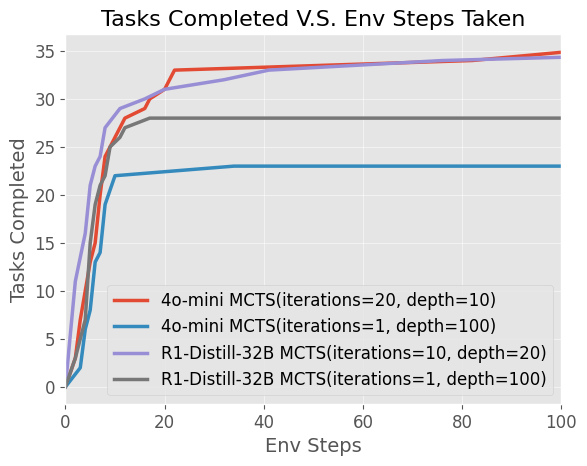

In [111]:
mini_20.plot(label="4o-mini MCTS(iterations=20, depth=10)")
mini_100.plot(label="4o-mini MCTS(iterations=1, depth=100)")

r1_20.plot(label="R1-Distill-32B MCTS(iterations=10, depth=20)")
r1_100.plot(label="R1-Distill-32B MCTS(iterations=1, depth=100)")
# nd_20.plot(label="Qwen2.5-32B MCTS(iterations=10, depth=20)")
# nd_100.plot(label="Qwen2.5-32B MCTS(iterations=1, depth=100)")
plt.xlabel("Env Steps")
plt.ylabel("Tasks Completed")
plt.legend()
# plt.ylim(0, 50)
plt.xlim(0, 100)
plt.title("Tasks Completed V.S. Env Steps Taken")

In [ ]:
df_r1.loc[20].mcts_df[
(df_r1.loc[20].mcts_df["completion_iteration"] == 0)
]

,completion_iteration,completion_depth,max_depth
task_name,,,
webarena.581,0.0,8.0,8.0
webarena.403,0.0,8.0,8.0
webarena.605,0.0,2.0,2.0
webarena.582,0.0,4.0,4.0
webarena.596,0.0,4.0,4.0
webarena.609,0.0,16.0,16.0
webarena.399,0.0,6.0,6.0
webarena.607,0.0,3.0,3.0
webarena.610,0.0,9.0,9.0


Text(0.5, 1.0, 'Tasks Completed V.S. Depth')

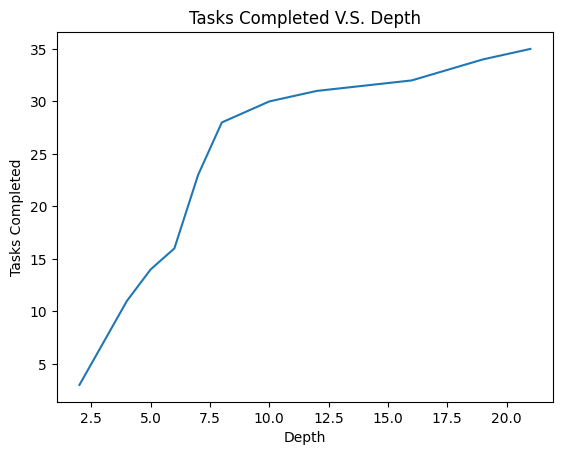

In [ ]:
df_r1.loc[20].mcts_df.completion_depth.value_counts().sort_index().cumsum().plot()
plt.xlabel("Depth")
plt.ylabel("Tasks Completed")
# plt.ylim(0, 1)
plt.title("Tasks Completed V.S. Depth")

In [ ]:
import numpy as np

tag = "d5"

task_iteration_stats_rows = []
results_dir = "./results"
exp_names = os.listdir(results_dir)
for exp_name in exp_names:
  if tag in exp_name:

    exp_path = os.path.join(results_dir, exp_name)
    task_names = os.listdir(exp_path)

    for task_name in task_names:
      if "webarena" in task_name:
        task_path = os.path.join(results_dir, exp_name, task_name)
        if os.path.exists(os.path.join(task_path, "result.pkl")):
          mcts_result = pickle.load(open(os.path.join(task_path, "result.pkl"), "rb"))
          if mcts_result.cum_reward >= 100: # task successfully completed
            completion_iteration = find_completion_iteration(mcts_result)
            task_iteration_stats_rows.append([task_name, completion_iteration])
          else:
            task_iteration_stats_rows.append([task_name, np.nan])
        else:
          task_iteration_stats_rows.append([task_name, np.nan])

/tmp/ipykernel_2704942/507405824.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


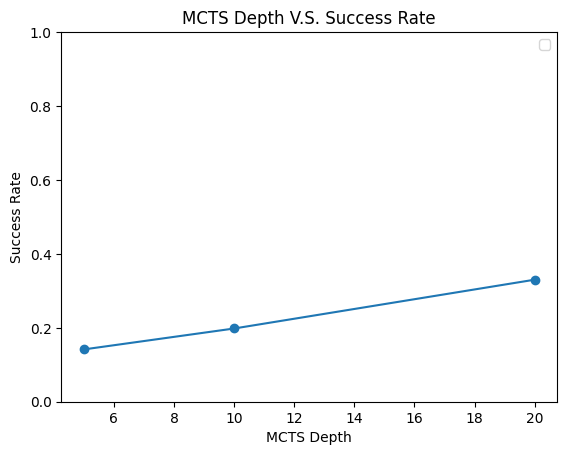

In [ ]:
plt.plot(df_r1.index, df_r1["success_rate"], marker="o")
plt.xlabel("MCTS Depth")
plt.ylabel("Success Rate")
plt.ylim(0, 1)
plt.title("MCTS Depth V.S. Success Rate")
plt.legend()
plt.show()